<div style="text-align:center">
    <h1>
        Off-policy Monte Carlo Control
    </h1>
</div>
<br>

In this notebook we are going to implement the other of the two major strategies that exist when learning a policy by interacting with the environment, called off-policy learning. We will use two policies: 
    
- An exploratory policy called b.
    
- A target policy that will learn from the experience collected by b, called $\pi$

<br><br>
<div style="text-align:center">
    <b>This notebook belongs to section 4 of the course "Reinforcement Learning: beginner to master".</b>
    <br><br>
    <a href="https://www.udemy.com">Reinforcement Learning: beginner to master</a> (English)
    <br>
    <a href="https://www.udemy.com">Reinforcement Learning: de principiante a maestro</a> (Spanish)
</div>

<br>

<table style="width:35%">
  <tr style="background-color: transparent">
    <td style="width: 45%">
        <a target="_parent" href="https://www.evlabs.io" style="float: center">
            <img src="img/evlabs-square.png" width="75"/>
        </a> 
    </td>
    <td valign="bottom">
        <a target="_parent" href="https://www.youtube.com/channel/UCksRNSzWuMV5IfdrPlglqqw">
            <img src="img/YouTube.png" width="35"/>
        </a> 
    </td>
    <td>
        <a target="_parent" href="https://www.linkedin.com/company/evlabs">
            <img src="img/LinkedIn.png" width="35"/>
        </a> 
    </td>
    <td>
        <a target="_parent" href="https://twitter.com/evelabs">
            <img src="img/Twitter.png" width="35"/>
        </a> 
    </td>
    <td>
        <a target="_parent" href="https://github.com/escape-velocity-labs/">
            <img src="img/GitHub.png" width="35"/>
        </a> 
    </td>

  </tr>
  <tr style="background-color: transparent">
    <th style="text-align: center; width: 70%">Escape Velocity Labs</th>
  </tr>

</table>

<br>

## Import the necessary software libraries:

In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F 
from torch import optim
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
from pyvirtualdisplay import Display
from IPython import display as ipythondisplay
from IPython.display import clear_output
from pathlib import Path

import random, os.path, math, glob, csv, base64, itertools, sys
import gym
from gym.wrappers import Monitor
from pprint import pprint

# The following code is will be used to visualize the environments.

def show_video(directory):
    html = []
    for mp4 in Path(directory).glob("*.mp4"):
        video_b64 = base64.b64encode(mp4.read_bytes())
        html.append('''<video alt="{}" autoplay 
                      loop controls style="height: 400px;">
                      <source src="data:video/mp4;base64,{}" type="video/mp4" />
                 </video>'''.format(mp4, video_b64.decode('ascii')))
    ipythondisplay.display(ipythondisplay.HTML(data="<br>".join(html)))
    
display = Display(visible=0, size=(1400, 900))
display.start();

def make_seed(seed):
    np.random.seed(seed=seed)
    torch.manual_seed(seed=seed)

In [2]:
import numpy as np
import matplotlib.pyplot as plt

from envs import Maze
from utils import plot_policy, plot_action_values, test_agent

## Initialize the environment

In [3]:
env = Maze()

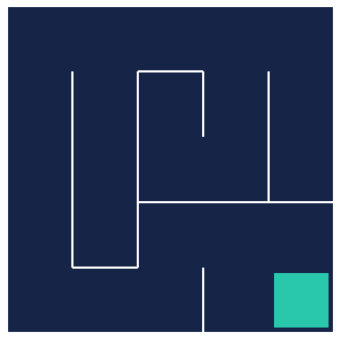

In [4]:
frame = env.render(mode='rgb_array')
plt.figure(figsize=(6, 6))
plt.axis('off')
plt.imshow(frame)

In [5]:
print(f"Observation space shape: {env.observation_space.nvec}")
print(f"Number of actions: {env.action_space.n}")

Observation space shape: [5 5]
Number of actions: 4


## Define value table $Q(s, a)$

#### Create the $Q(s, a)$ table

In [6]:
action_values = np.full((5, 5, 4), -100)
action_values[4,4,:] =0

#### Plot $Q(s, a)$

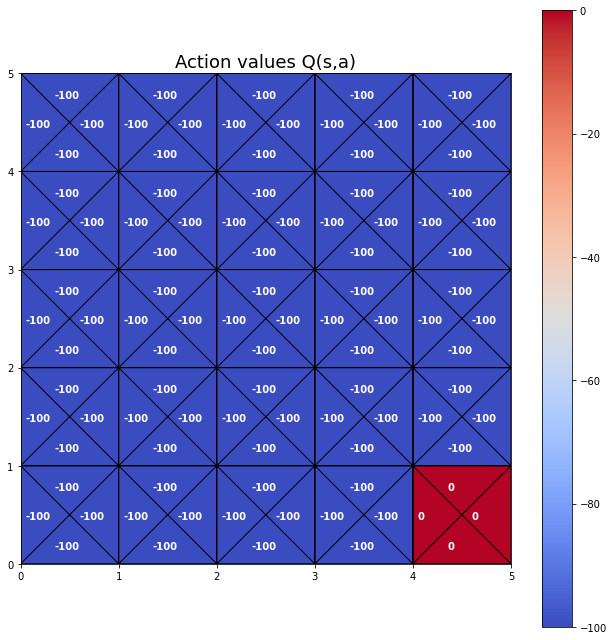

In [7]:
plot_action_values(action_values)

## Define the target policy $\pi(s)$

#### Create the policy $\pi(s)$

In [8]:
def target_policy(state):
    av = action_values[state]
    
    return np.random.choice(np.flatnonzero(av == av.max()))

#### Test the policy with state (0, 0)

In [9]:
target_policy((0,0))

1

#### Plot the policy

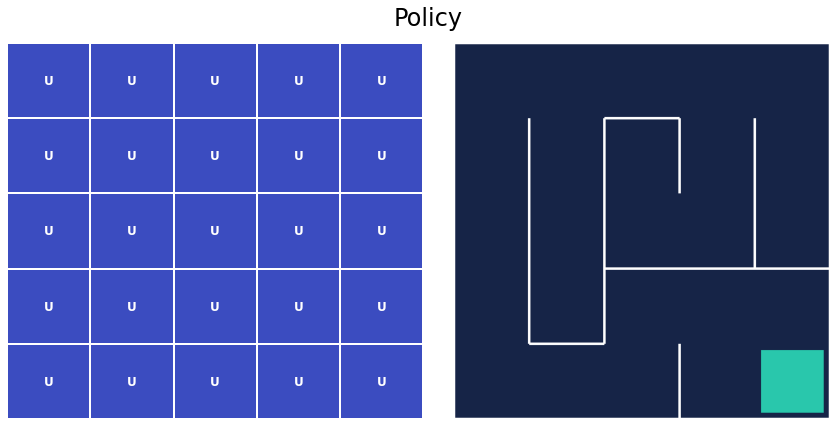

In [10]:
plot_policy(action_values, frame)

## Define the exploratory policy $b(s)$

#### Create the policy $b(s)$

In [11]:
def explo_policy(state, epsilon =0.):
    if np.random.random()<0:
        return np.random.choice(4)
    return target_policy(state)

#### Test the policy with state (0, 0)

In [12]:
explo_policy((0,0), epsilon=0.5)

3

## Implement the algorithm

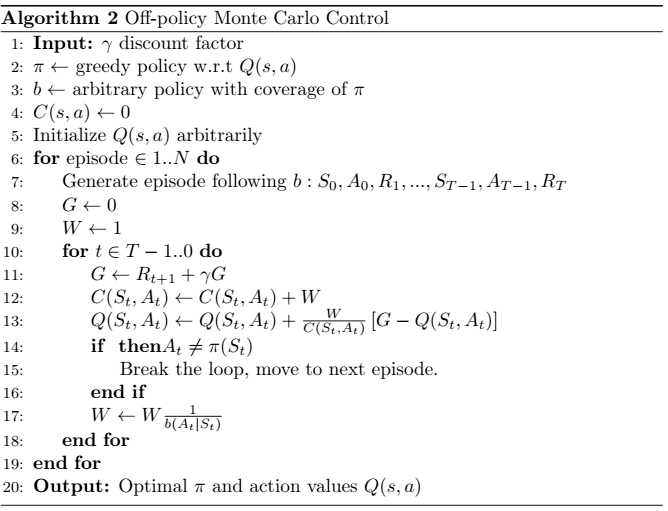

</br>



<div style="text-align:center">
    Adapted from Barto & Sutton: "Reinforcement Learning: An Introduction".
</div>

In [13]:
def off_policy_mc(action_values, target_policy, explo_policy, episodes, gamma = 0.99, epsion = 0.2):
    csa = np.zeros((5,5,4))
    for episodes in range(1, episodes + 1):
        G = 0
        W = 1
        state = env.reset()
        done = False
        transitions = []
        
        while not done:
            action = explo_policy(state, epsion)
            next_state, reward, done, _ = env.step(action)
            transitions.append([state, action, reward])
            state = next_state
            
        for state_t, action_t, reward_t in reversed(transitions):
            G = reward_t + gamma * G
            csa[state_t][action_t] += W
            qsa = action_values[state_t][action_t]
#             print(f"action_t {action_t}, state_t {state_t}, {action_values[state_t][action_t]}")
#             print(f"csa {csa[state_t][action_t]}")
#             bla = (W/csa[state_t][action_t]) * (G-qsa)

            action_values[state_t][action_t] += (W/csa[state_t][action_t]) * (G-qsa)
            
            if action_t != target_policy(state_t):
                break
            W = W * 1/(1-epsion + epsion/4) # the action taken is the same as the explo action
    

In [14]:
off_policy_mc(action_values, target_policy, explo_policy, 1000, gamma = 0.99, epsion = 0.2)

## Show results

#### Show resulting value table $Q(s, a)$

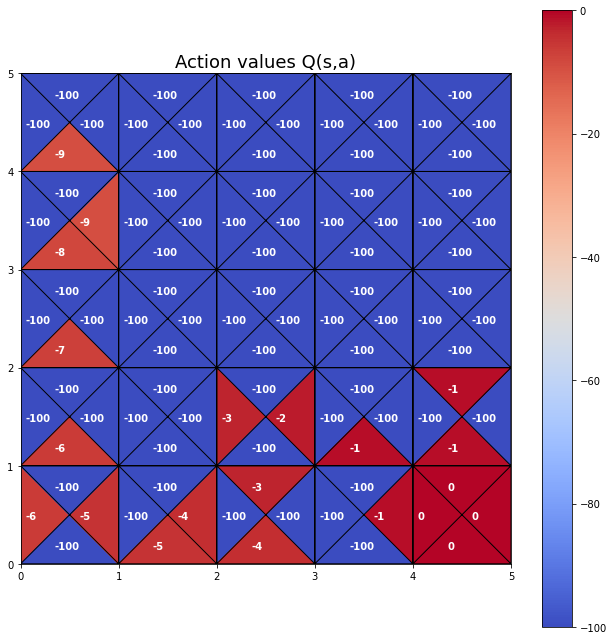

In [16]:
plot_action_values(action_values)

#### Show resulting policy $\pi(\cdot|s)$

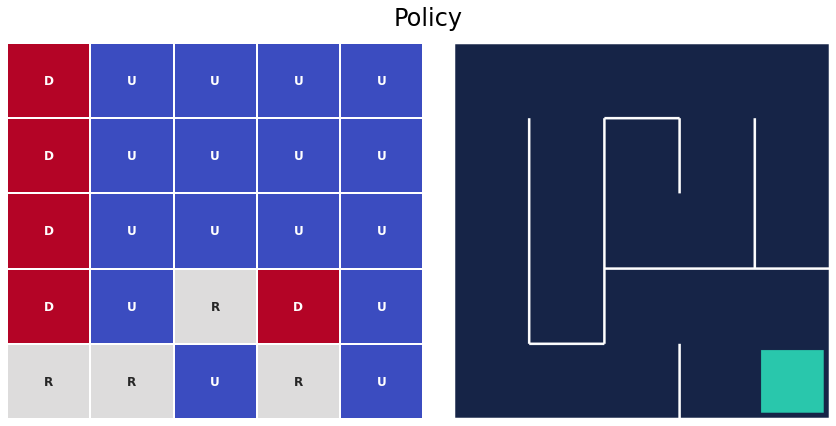

In [17]:
plot_policy(action_values, frame)

#### Test the resulting agent

In [ ]:
test_agent(env, target_policy, episodes = 1)

## Resources

[[1] Reinforcement Learning: An Introduction. Ch. 5: Monte Carlo methods](https://web.stanford.edu/class/psych209/Readings/SuttonBartoIPRLBook2ndEd.pdf)